# Preprocessing:

*Encode categorical data (e.g., 'Influencing Factor', 'Preferred Job') using one-hot encoding or MultiLabelBinarizer.

*Normalize numerical data (e.g., CGPA, skill ratings) using StandardScaler.

In [1]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import precision_score,accuracy_score, hamming_loss, f1_score,recall_score
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("clean_data.csv")
df

,Unnamed: 0,gender,year,cgpa,university_name,Critical Thinking,Problem Solving,Team Work,Communication Skill,Software Engineering Principal,...,Understanding Operating System,Networking Concept,Cyber Security Skill,Machine Learning Skill,Robotics Skill,Research Skill,publication,project,Influencing Factor,Prefer Job
0,0,1,4,3.84,Bangabandhu Sheikh Mujibur Rahman Science & Te...,2,3,3,2,3,...,1,0,0,1,0,2,1,2,"Social Acceptance,Job Security","Software Development,Teaching"
1,1,0,4,2.50,Bangabandhu Sheikh Mujibur Rahman Science & Te...,1,1,1,1,1,...,1,1,1,1,1,1,0,0,flaxible Work Life Balanced,Teaching
2,2,0,4,3.34,Bangabandhu Sheikh Mujibur Rahman Science & Te...,2,2,2,1,1,...,1,1,1,1,1,1,0,2,"Salary,Job Environment",Software Development
3,3,0,4,3.78,United International University (UIU),2,3,2,2,2,...,2,2,1,1,1,1,0,1,"Salary,Job Environment",Software Development
4,4,0,4,3.00,Bangabandhu Sheikh Mujibur Rahman Science & Te...,2,3,3,2,2,...,2,3,3,1,1,1,0,5,"Salary,Job Environment",Software Development
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,463,1,4,3.20,Northern University Bangladesh (NUB),2,1,2,2,1,...,1,1,1,1,1,1,0,2,Other Factor,"Bank Job,Govt Job"
464,464,0,4,3.64,Comilla University (CoU),2,2,2,3,2,...,2,2,3,1,1,2,2,4,"Job Environment,Salary","Software Development,Networking,Cyber Security..."
465,465,0,4,3.70,Comilla University (CoU),2,3,2,3,2,...,1,1,1,1,2,3,3,3,"Job Environment,Salary,Social Acceptance",Abroad
466,466,0,4,3.30,Northern University Bangladesh (NUB),2,2,2,1,2,...,1,3,2,1,0,1,0,2,"Job Environment,Salary","Networking,Cyber Security"


In [3]:
df = pd.read_csv("clean_data.csv")
#df

columns_to_drop = ['Unnamed: 0','university_name']
df = df.drop(columns_to_drop, axis=1)
#df

df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']), columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']), columns=mlb_prefer_job.classes_, index=df.index)

df = pd.concat([df.drop(['Influencing Factor', 'Prefer Job'], axis=1), influencing_factors_encoded, prefer_job_encoded], axis=1)

#df.columns


# Feature Engineering:

In [4]:
import pandas as pd
skills_df = pd.read_csv('Skills_list.csv')
skills = skills_df.iloc[:, 0].tolist()
#skills

df['Average Skill Rating'] = df[skills].mean(axis=1)

# Example: Calculate total projects and publications
df['Total Projects/Publications'] = df['project'] + df['publication']

# Example: Count skills rated above a certain threshold
threshold = 2  # Example threshold for skill rating
df['Skill Diversity'] = (df[skills] > threshold).sum(axis=1)

# Example: Create a feature for Machine Learning and Data Analysis combination
df['ML_DA_Combination'] = (df['Machine Learning Skill'] > 0) & (df['Data Analysis skill'] > 0)

df.head()

,gender,year,cgpa,Critical Thinking,Problem Solving,Team Work,Communication Skill,Software Engineering Principal,Data Structure & Algorithm,Database Management,...,Networking,Other,Researcher,Software Development,Teaching,UI/UX Designing,Average Skill Rating,Total Projects/Publications,Skill Diversity,ML_DA_Combination
0,1,4,3.84,2,3,3,2,3,3,2,...,0,0,0,1,1,0,1.833684,3,6,True
1,0,4,2.50,1,1,1,1,1,1,1,...,0,0,0,0,1,0,1.026316,0,1,True
2,0,4,3.34,2,2,2,1,1,2,2,...,0,0,0,1,0,0,1.438947,2,1,True
3,0,4,3.78,2,3,2,2,2,2,2,...,0,0,0,1,0,0,1.725263,1,2,True
4,0,4,3.00,2,3,3,2,2,2,3,...,0,0,0,1,0,0,2.315789,5,9,True


# Principal Component Analysis (PCA)

Explained variance ratio: [0.19535359 0.07708629 0.05517032 0.0541012  0.04204493 0.04090468
 0.03412264 0.03030619 0.02760492 0.0261525  0.0242016  0.02376712]


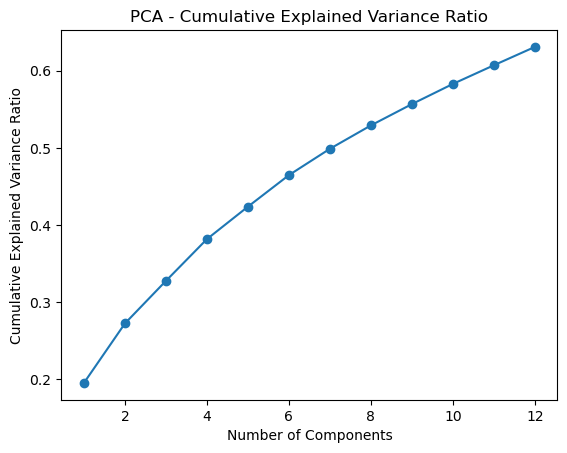

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt  


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)  # Assuming 'Student ID' is not a feature

# Initialize PCA with desired number of components
n_components = 12  # Example: Reduce to 10 principal components
pca = PCA(n_components=n_components)

# Fit PCA and transform data
pca_result = pca.fit_transform(scaled_data)

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Visualize cumulative explained variance ratio
plt.plot(range(1, n_components+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA - Cumulative Explained Variance Ratio')
plt.show()

# Apply ML Algorithm 
Train Test Split

In [6]:
df = pd.read_csv("clean_data.csv")

df['Research Score']= (df['Research Skill']+df['publication'])/2

columns_to_drop = ['Research Skill','publication']

df = df.drop(columns_to_drop, axis=1)

df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']), columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']), columns=mlb_prefer_job.classes_, index=df.index)



prefer_job_encoded['Govt Job'] = prefer_job_encoded['Govt Job'] | prefer_job_encoded['BCS'] | prefer_job_encoded['Bank Job']
prefer_job_encoded['Software Sector'] = prefer_job_encoded['Cyber Security'] | prefer_job_encoded['Data Analysis'] | prefer_job_encoded['Database Administration'] | prefer_job_encoded['Gaming'] | prefer_job_encoded ['ML/AI Engineer'] | prefer_job_encoded['Software Development']  | prefer_job_encoded['UI/UX Designing']


drop_job = ['Bank Job','BCS','Cyber Security','Data Analysis','Database Administration','Gaming','ML/AI Engineer','Software Development','UI/UX Designing']


prefer_job_encoded = prefer_job_encoded.drop(drop_job,axis = 1)

df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

columns_to_drop = ['Unnamed: 0','university_name','Influencing Factor','Prefer Job']

df = df.drop(columns_to_drop, axis=1)

X = df.drop(prefer_job_encoded.columns, axis=1)
y = prefer_job_encoded

numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Standardize the features (excluding categorical columns)
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
#y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y

,Abroad,Business,Govt Job,Hardware Sector,Management,Networking,Other,Researcher,Teaching,Software Sector
0,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
463,0,0,1,0,0,0,0,0,0,0
464,0,0,0,0,0,1,0,1,0,1
465,1,0,0,0,0,0,0,0,0,0
466,0,0,0,0,0,1,0,0,0,1


In [8]:
import time
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    #print(y_test)
    #print(y_pred)
    
    precision = precision_score(y_test, y_pred,average = 'micro')
    recall = recall_score(y_test, y_pred,average = 'micro')
    f1 = f1_score(y_test, y_pred,average = 'micro')
    f1_m = f1_score(y_test, y_pred,average = 'macro', zero_division=1)
    hl = hamming_loss(y_test, y_pred)
    return accuracy, precision, recall, f1,f1_m,hl,y_pred

# Initialize the models
models = {
    'Logistic Regression' : OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42)),
    'Decision Tree':OneVsRestClassifier(DecisionTreeClassifier(max_depth=10, random_state=317)),
    'Random Forest': MultiOutputClassifier(RandomForestClassifier(random_state=42)),
    'Gradient Boosting': OneVsRestClassifier(GradientBoostingClassifier(random_state=42)),
    'XGBoost Classifier': OneVsRestClassifier(xgb.XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=5, random_state=42)),
    'Hard Voting Classifier':MultiOutputClassifier(VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=10000, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
], voting='hard')),
    'Soft Voting Classifier':MultiOutputClassifier(VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=10000, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
], voting='soft')),
    'Support Vector Machines (SVM)': OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42)),
    'Nural Network': MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)),
    'KNN' : OneVsRestClassifier(KNeighborsClassifier(n_neighbors=7,weights='distance', metric='manhattan'), random_state=37)
}


results = {}
for name, model in models.items():
    start_time = time.time()  # Start the timer
    accuracy, precision, recall, f1, f1_m, hl, y_pred = evaluate_model(model, X_train, y_train, X_test, y_test)
    end_time = time.time()  # End the timer
    execution_time = end_time - start_time  # Calculate execution time
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score (Micro)': f1,
        'F1 Score (Macro)': f1_m,
        'Hamming Loss': hl,
        'Execution Time (s)': execution_time
    }
# Create a DataFrame to display the results
results_data = pd.DataFrame(results).T
y_eval = pd.DataFrame(y_pred)
results_data.to_csv('accuracy.csv')
results_data

TypeError: OneVsRestClassifier.__init__() got an unexpected keyword argument 'random_state'

# Stockatic Gradient Descent Classifier

In [28]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

# Define SGD model with OneVsRest strategy
sgd_model = OneVsRestClassifier(SGDClassifier(random_state=42))

# Parameter grid for tuning
param_grid = {
    'estimator__loss': ['hinge', 'log', 'modified_huber'],
    'estimator__penalty': ['l2', 'l1', 'elasticnet'],
    'estimator__alpha': [0.0001, 0.001, 0.01],
    'estimator__max_iter': [1000, 2000, 5000]
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=sgd_model, param_grid=param_grid, scoring='f1_micro', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_sgd_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_pred = best_sgd_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')
f1_m = f1_score(y_test, y_pred, average='macro')
hl = hamming_loss(y_test, y_pred)

# Output results
print("Best Parameters:", best_params)
print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score (Micro): {f1:.4f}")
print(f"F1 Score (Macro): {f1_m:.4f}")
print(f"Hamming Loss: {hl:.4f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'estimator__alpha': 0.01, 'estimator__loss': 'hinge', 'estimator__max_iter': 1000, 'estimator__penalty': 'l1'}

Test Set Evaluation:
Accuracy: 0.4149
Precision: 0.8283
Recall: 0.5655
F1 Score (Micro): 0.6721
F1 Score (Macro): 0.4184
Hamming Loss: 0.0851


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\multiclass.py", line 370, in fit
    self.estimators_ = Parallel(n_jo

In [22]:
jobs = y.columns
jobs

Index(['Abroad', 'Business', 'Govt Job', 'Hardware Sector', 'Management',
       'Networking', 'Other', 'Researcher', 'Teaching', 'Software Sector'],
      dtype='object')

In [24]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

# Assuming mlb_prefer_job and X_train, y_train, X_test, y_test are already defined
# Get job categories from MultiLabelBinarizer
job_categories = mlb_prefer_job.classes_

# Function to create a DataFrame with algorithms as rows and job categories as columns
def predictions_to_dataframe(y_preds, model_names, job_categories):
    predictions_dict = {}
    for y_pred, model_name in zip(y_preds, model_names):
        model_predictions = []
        for category in job_categories:
            prediction_percentage = (y_pred[:, jobs == category].sum() / len(y_pred)) * 100
            model_predictions.append(f"{prediction_percentage:.2f}%")
        predictions_dict[model_name] = model_predictions
    predictions_df = pd.DataFrame(predictions_dict, index=job_categories)
    return predictions_df

# Define the algorithms
models = {
    'Logistic Regression' : OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42)),
    'Decision Tree':OneVsRestClassifier(DecisionTreeClassifier(max_depth=10, random_state=317)),
    'Random Forest': MultiOutputClassifier(RandomForestClassifier(random_state=42)),
    'Gradient Boosting': OneVsRestClassifier(GradientBoostingClassifier(random_state=42)),
    'XGBoost Classifier': OneVsRestClassifier(xgb.XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=5, random_state=42)),
    'Hard Voting Classifier':MultiOutputClassifier(VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=10000, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
], voting='hard')),
    'Soft Voting Classifier':MultiOutputClassifier(VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=10000, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
], voting='soft')),
    'Support Vector Machines (SVM)': OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42)),
    'Nural Network': MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)),
    'KNN' : OneVsRestClassifier(KNeighborsClassifier(n_neighbors=7,weights='distance', metric='manhattan'))
}

# Train models and collect predictions
y_preds = []
model_names = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_preds.append(y_pred)
    model_names.append(model_name)

# Generate the predictions DataFrame
predictions_df = predictions_to_dataframe(y_preds, model_names, jobs)

# Transpose to have algorithms as rows
predictions_df = predictions_df.T

# Optionally, save to a CSV file
# predictions_df.to_csv('predictions.csv')

# Display the DataFrame
predictions_df


,Abroad,Business,Govt Job,Hardware Sector,Management,Networking,Other,Researcher,Teaching,Software Sector
Logistic Regression,12.77%,2.13%,9.57%,2.13%,1.06%,7.45%,2.13%,7.45%,5.32%,68.09%
Decision Tree,18.09%,8.51%,18.09%,2.13%,7.45%,7.45%,8.51%,5.32%,13.83%,69.15%
Random Forest,13.83%,2.13%,6.38%,1.06%,0.00%,3.19%,6.38%,4.26%,4.26%,63.83%
Gradient Boosting,13.83%,4.26%,5.32%,3.19%,3.19%,3.19%,7.45%,5.32%,3.19%,63.83%
XGBoost Classifier,18.09%,4.26%,9.57%,3.19%,2.13%,5.32%,6.38%,8.51%,10.64%,64.89%
Hard Voting Classifier,14.89%,3.19%,9.57%,2.13%,0.00%,5.32%,6.38%,5.32%,3.19%,64.89%
Soft Voting Classifier,14.89%,6.38%,12.77%,2.13%,1.06%,6.38%,7.45%,4.26%,8.51%,67.02%
Support Vector Machines (SVM),12.77%,2.13%,7.45%,3.19%,0.00%,5.32%,6.38%,6.38%,1.06%,68.09%
Nural Network,18.09%,3.19%,8.51%,2.13%,3.19%,7.45%,2.13%,3.19%,9.57%,65.96%
KNN,13.83%,2.13%,7.45%,1.06%,0.00%,3.19%,2.13%,6.38%,7.45%,68.09%


# Predict Probability

In [25]:
print("full data shape :",X.shape)
print("training data shape : ",X_train.shape)
print("test data shape : ",X_test.shape)

# XGBoost Classifier
xgb_model = OneVsRestClassifier(xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
xgb_model.fit(X_train, y_train)

# Define a function to predict job probabilities based on input data
def predict_job_probabilities(input_data):
    # Convert input data to DataFrame
    input_df = pd.DataFrame([input_data])

    # Process 'Influencing Factor' for encoding
    input_df['Influencing Factor'] = input_df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
    influencing_factors_encoded_input = pd.DataFrame(mlb_influencing.transform(input_df['Influencing Factor']),
                                                    columns=mlb_influencing.classes_)

    # Drop 'Influencing Factor' after encoding
    input_df = input_df.drop(['Influencing Factor'], axis=1)

    # Concatenate encoded features with input DataFrame
    
    input_df['Research Score']= (input_df['Research Skill']+input_df['publication'])/2

    columns_to_drop = ['Research Skill','publication']

    input_df = input_df.drop(columns_to_drop, axis=1)
    input_df = pd.concat([input_df, influencing_factors_encoded_input], axis=1)
    # Standardize numerical columns in input data
    input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

    # Predict probabilities using the trained XGBoost model
    y_pred_prob = xgb_model.predict_proba(input_df)


    # Extracting only the 'Prefer Job' categories probabilities
    predicted_probabilities = {}
    for idx, job_category in enumerate(jobs):
        predicted_probabilities[job_category] = y_pred_prob[0][idx] * 100  # Convert probability to percentage

    return predicted_probabilities

# Example input data for prediction (excluding 'Machine Learning' skill)
input_data = {
    'gender':1,
    'year':3,
    'cgpa': 3.9,
    'Critical Thinking': 2,
    'Problem Solving': 0,
    'Team Work': 0,
    'Communication Skill': 2,
    'Software Engineering Principal': 1,
    'Data Structure & Algorithm': 2,
    'Database Management': 2,
    'Data Analysis skill': 2,
    'Web Developing Skill': 0,
    'Understanding of computer architecture & System': 0,
    'Understanding Operating System': 0,
    'Networking Concept': 1,
    'Cyber Security Skill': 1,
    'Machine Learning Skill': 1, 
    'Robotics Skill': 0,
    'Research Skill': 3,
    'publication': 5,
    'project': 3,
    'Influencing Factor': 'Salary,Job Environment'
}

# Predict job categories based on input data
predicted_probabilities = predict_job_probabilities(input_data)

# Sort predicted probabilities in descending order
sorted_probabilities = sorted(predicted_probabilities.items(), key=lambda x: x[1], reverse=True)

print("Predicted Prefer Job Categories with Probabilities (Descending Order):")
for job_category, percentage in sorted_probabilities:
    print(f"{job_category}: {percentage:.2f}%")


full data shape : (468, 26)
training data shape :  (374, 26)
test data shape :  (94, 26)
Predicted Prefer Job Categories with Probabilities (Descending Order):
Abroad: 90.31%
Researcher: 31.19%
Software Sector: 22.73%
Teaching: 0.78%
Hardware Sector: 0.43%
Management: 0.38%
Business: 0.28%
Other: 0.14%
Networking: 0.11%
Govt Job: 0.02%


# Predict Using all algorithm

In [26]:
# Define all algorithms
algorithms = {
    "Gradient Boosting": OneVsRestClassifier(GradientBoostingClassifier(random_state=42)),
    "Random Forest": OneVsRestClassifier(RandomForestClassifier(random_state=42)),
    "XGBoost": OneVsRestClassifier(xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
}

# Train each model
models = {}
for model_name, model in algorithms.items():
    model.fit(X_train, y_train)
    models[model_name] = model

# Function to predict job probabilities with all models
def predict_job_probabilities_all(input_data, models, jobs):
    input_df = pd.DataFrame([input_data])

    # Process 'Influencing Factor' for encoding
    input_df['Influencing Factor'] = input_df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
    influencing_factors_encoded_input = pd.DataFrame(mlb_influencing.transform(input_df['Influencing Factor']),
                                                    columns=mlb_influencing.classes_)

    # Drop 'Influencing Factor' after encoding
    input_df = input_df.drop(['Influencing Factor'], axis=1)

    # Concatenate encoded features with input DataFrame
    input_df['Research Score'] = (input_df['Research Skill'] + input_df['publication']) / 2
    input_df = input_df.drop(['Research Skill', 'publication'], axis=1)
    input_df = pd.concat([input_df, influencing_factors_encoded_input], axis=1)

    # Standardize numerical columns in input data
    input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

    # Collect predictions for all models
    predictions = {}
    for model_name, model in models.items():
        y_pred_prob = model.predict_proba(input_df)
        predicted_probabilities = {
            job_category: y_pred_prob[0][idx] * 100 for idx, job_category in enumerate(jobs)
        }
        predictions[model_name] = sorted(predicted_probabilities.items(), key=lambda x: x[1], reverse=True)

    return predictions

# Predict job categories using all models
predictions_all_models = predict_job_probabilities_all(input_data, models, jobs)

# Display results
for model_name, sorted_probabilities in predictions_all_models.items():
    print(f"\nPredictions for {model_name}:")
    for job_category, percentage in sorted_probabilities:
        print(f"{job_category}: {percentage:.2f}%")



Predictions for Gradient Boosting:
Abroad: 73.65%
Researcher: 59.53%
Teaching: 38.35%
Software Sector: 14.58%
Networking: 1.13%
Other: 0.52%
Business: 0.21%
Govt Job: 0.08%
Management: 0.03%
Hardware Sector: 0.00%

Predictions for Random Forest:
Abroad: 56.00%
Software Sector: 50.00%
Teaching: 26.00%
Other: 24.00%
Researcher: 22.00%
Business: 11.00%
Networking: 10.00%
Govt Job: 7.00%
Management: 6.00%
Hardware Sector: 0.00%

Predictions for XGBoost:
Abroad: 90.31%
Researcher: 31.19%
Software Sector: 22.73%
Teaching: 0.78%
Hardware Sector: 0.43%
Management: 0.38%
Business: 0.28%
Other: 0.14%
Networking: 0.11%
Govt Job: 0.02%


In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, hamming_loss
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb



# Initialize the models
models = {
    'Logistic Regression' : OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42)),
    'Decision Tree':OneVsRestClassifier(DecisionTreeClassifier(max_depth=10, random_state=317)),
    'Random Forest': MultiOutputClassifier(RandomForestClassifier(random_state=42)),
    'Gradient Boosting': OneVsRestClassifier(GradientBoostingClassifier(random_state=42)),
    'XGBoost Classifier': OneVsRestClassifier(xgb.XGBClassifier(learning_rate=0.1, n_estimators=200, max_depth=5, random_state=42)),
    'Hard Voting Classifier':MultiOutputClassifier(VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=10000, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
], voting='hard')),
    'Soft Voting Classifier':MultiOutputClassifier(VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=10000, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
], voting='soft')),
    'Support Vector Machines (SVM)': OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42)),
    'Nural Network': MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)),
    'KNN' : OneVsRestClassifier(KNeighborsClassifier(n_neighbors=7,weights='distance', metric='manhattan'))
}

# Define evaluation metrics
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc_ovr']

# Perform cross-validation and evaluate models
for name, model in models.items():
    print(f"Evaluating {name}...")
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring)
    
    # Extract and print evaluation metrics
    accuracy = cv_results['test_accuracy'].mean()
    precision = cv_results['test_precision_macro'].mean()
    recall = cv_results['test_recall_macro'].mean()
    #f1 = cv_results['test_f1_macro'].mean()
   # roc_auc = cv_results['test_roc_auc_ovr'].mean()
    
    print(f"Cross-validation results for {name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    #print(f"F1-score: {f1:.2f}")
   # print(f"ROC-AUC: {roc_auc:.2f}")
    print("\n")


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data points
np.random.seed(42)
class_1 = np.random.rand(10, 2) * 0.5  # Cluster 1
class_2 = np.random.rand(10, 2) * 0.5 + 0.5  # Cluster 2
test_point = np.array([[0.5, 0.5]])  # Test point

# Combine data
data = np.vstack((class_1, class_2))
labels = ['Class 1'] * 10 + ['Class 2'] * 10

# Create the plot
plt.figure(figsize=(5, 4))
plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', label='Class 1', s=50)
plt.scatter(class_2[:, 0], class_2[:, 1], color='red', label='Class 2', s=50)
plt.scatter(test_point[:, 0], test_point[:, 1], color='green', label='Test Point', s=100, marker='x')

# Draw connections to neighbors (simulated for illustration purposes)
neighbors = [class_1[2], class_2[1], class_2[3]]
for neighbor in neighbors:
    plt.plot([test_point[0, 0], neighbor[0]], [test_point[0, 1], neighbor[1]], color='gray', linestyle='--')

# Add labels and legend
#plt.title("K-Nearest Neighbors (KNN) Example", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)

plt.savefig('knn.pdf', format="pdf")
plt.close()



In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("clean_data.csv")



df['Influencing Factor'] = df['Influencing Factor'].apply(lambda x: [cat.strip() for cat in x.split(',')])
df['Prefer Job'] = df['Prefer Job'].apply(lambda x: [cat.strip() for cat in x.split(',')])

# Using MultiLabelBinarizer for 'Influencing Factor' and 'Prefer Job'
mlb_influencing = MultiLabelBinarizer()
influencing_factors_encoded = pd.DataFrame(mlb_influencing.fit_transform(df['Influencing Factor']), columns=mlb_influencing.classes_, index=df.index)

mlb_prefer_job = MultiLabelBinarizer()
prefer_job_encoded = pd.DataFrame(mlb_prefer_job.fit_transform(df['Prefer Job']), columns=mlb_prefer_job.classes_, index=df.index)


df = pd.concat([df, influencing_factors_encoded, prefer_job_encoded], axis=1)

y = prefer_job_encoded

numeric_columns = y.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Visualize correlation matrix with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='Blues', 
            fmt='.2f',
            annot_kws={'fontsize': 7},  # Reduce annotation font size
            cbar_kws={'shrink': 0.8}
           )
plt.savefig('skills_heatmap.pdf', dpi=300, bbox_inches='tight')  # Save as PDF
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x600 with 0 Axes>

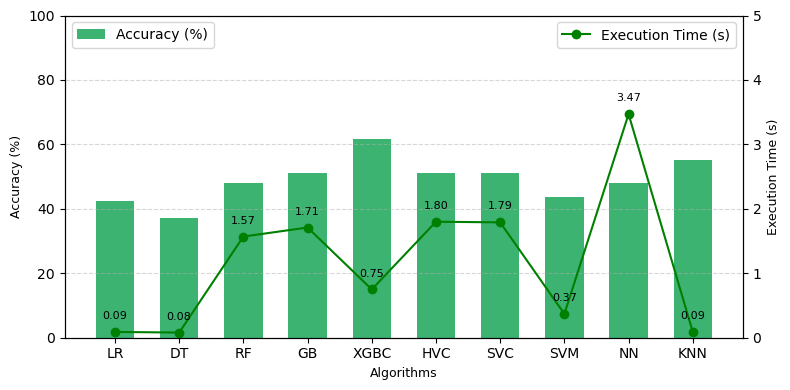

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
algorithms = [
    'LR', 'DT', 'RF', 'GB', 'XGBC', 'HVC', 'SVC', 'SVM', 'NN', 'KNN'
]
accuracy = [
    42.55, 37.23, 47.87, 51.06, 61.7, 51.06, 51.06, 43.61, 47.87, 55.31
]
execution_time = [
    0.09, 0.08, 1.57, 1.71, 0.75, 1.80, 1.79, 0.37, 3.47, 0.09
]

# Creating the plot
fig, ax1 = plt.subplots(figsize=(8, 4))

# Bar plot for Accuracy
bar_width = 0.6
x = np.arange(len(algorithms))
ax1.bar(x, accuracy, color='mediumseagreen', width=bar_width, label='Accuracy (%)')
ax1.set_xlabel('Algorithms', fontsize=9)
ax1.set_ylabel('Accuracy (%)', fontsize=9)
ax1.tick_params(axis='y')
ax1.set_xticks(x)
ax1.set_xticklabels(algorithms)
ax1.set_ylim(0, 100)
ax1.legend(loc='upper left')

# Line plot for Execution Time
ax2 = ax1.twinx()
ax2.plot(x, execution_time, marker='o', label='Execution Time (s)',color='green')
ax2.set_ylabel('Execution Time (s)', fontsize=9)
ax2.tick_params(axis='y')
ax2.set_ylim(0, 5)
ax2.legend(loc='upper right')

# Adding labels for execution time
for i, et in enumerate(execution_time):
    ax2.text(x[i], et + 0.2, f'{et:.2f}', ha='center', color='black', fontsize=8)

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('accuracy.pdf', dpi=300, bbox_inches='tight')
plt.show()
